In [1]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import repeat
from networkx.algorithms import community

# Import dataframe with 2 columns
df = pd.read_json("testdata.json")
df.columns = ['a', 'b']
df.head()


,a,b
0,Luke,Obi
1,Jabba,Boba
2,Han,Chewy
3,Han,Lando
4,Luke,Han


In [2]:
# Converting the df to a list for network edges
edgesList = df.values.tolist()
print(edgesList)
# Converting the df to a dictionary for network nodes
nodeDict = df.to_dict('list')
print(nodeDict)

[['Luke', 'Obi'], ['Jabba', 'Boba'], ['Han', 'Chewy'], ['Han', 'Lando'], ['Luke', 'Han'], ['Boba', 'Jango']]
{'a': ['Luke', 'Jabba', 'Han', 'Han', 'Luke', 'Boba'], 'b': ['Obi', 'Boba', 'Chewy', 'Lando', 'Han', 'Jango']}


In [3]:
# Creating an empty graph
G = nx.Graph()
# Adding nodes from both lists in the dictionary
# Effectively a merge of the two lists
G.add_nodes_from(nodeDict['a'])
G.add_nodes_from(nodeDict['b'])

# printing out the nodes
G.nodes()

NodeView(('Luke', 'Jabba', 'Han', 'Boba', 'Obi', 'Chewy', 'Lando', 'Jango'))

In [4]:
# Adding the edges from the edges list
G.add_edges_from(edgesList)
G.edges()


EdgeView([('Luke', 'Obi'), ('Luke', 'Han'), ('Jabba', 'Boba'), ('Han', 'Chewy'), ('Han', 'Lando'), ('Boba', 'Jango')])

C:\Users\Alexander\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


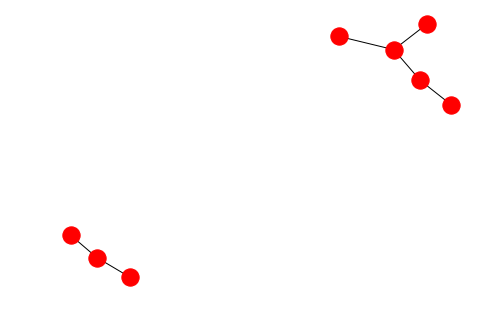

In [5]:
# Draw the graph to screen
nx.draw(G)
plt.show()

In [6]:
# Generates groups
# TODO check that Size of smallest clique, here 2 is dynamic
comm = list(community.k_clique_communities(G, 2))
print(comm)

[frozenset({'Lando', 'Chewy', 'Han', 'Obi', 'Luke'}), frozenset({'Jango', 'Boba', 'Jabba'})]


In [7]:
# Splits the communities into two lists
comm1 = list(comm[0])
comm2 = list(comm[1])
print(comm1)
print(comm2)

['Lando', 'Chewy', 'Han', 'Obi', 'Luke']
['Jango', 'Boba', 'Jabba']


In [8]:
# Generates list of the group name
# Replicates the group name to match community list length
group1 = list(repeat(comm1[0], len(comm1)))
group2 = list(repeat(comm2[0], len(comm2)))

In [9]:
# combines each group name and community list into a dataframe
dfGroup1 = pd.DataFrame(list(zip(group1, comm1)), columns=['Group', 'key'])
dfGroup2 = pd.DataFrame(list(zip(group2, comm2)), columns=['Group', 'key'])
dfGroup1
dfGroup2
# Combines both dataframes into the final dataframe
dfOutput = dfGroup1.append(dfGroup2, ignore_index=True)
dfOutput

,Group,key
0,Lando,Lando
1,Lando,Chewy
2,Lando,Han
3,Lando,Obi
4,Lando,Luke
5,Jango,Jango
6,Jango,Boba
7,Jango,Jabba
